In [1]:
from ivanoscience import *

In [2]:
kaggle_competition='digit-recognizer'

!kaggle competitions download -c {kaggle_competition} -p {raw} --quiet

In [3]:
!ls {raw}

digit-recognizer.zip  test.csv
sample_submission.csv train.csv


In [4]:
!ls {raw}/train.csv 2>&1 > /dev/null ||\
    unzip {raw}/digit-recognizer.zip -d raw

In [5]:
ls {raw}

digit-recognizer.zip   test.csv
sample_submission.csv  train.csv


In [6]:
import pandas as pd

In [7]:
df_train = pd.read_csv(f'{raw}/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
im1 = df_train.iloc[0].values[1:].reshape((28, 28))

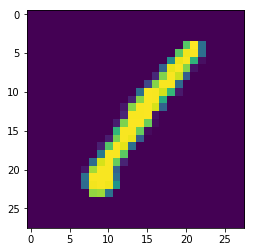

In [11]:
plt.imshow(im1)

In [12]:
len(df_train)

42000

In [13]:
df_train['label'].value_counts() / float(len(df_train))

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [14]:
df_test = pd.read_csv(f'{raw}/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
len(df_test)

28000

In [16]:
pixels_train = df_train.loc[:, 'pixel0':'pixel783']

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [27]:
from joblib import Memory
memory = Memory(location='./cache', verbose=10)

In [28]:
@memory.cache
def pca(X, **args):
    t = PCA(**args)
    return t.fit_transform(X)

In [20]:
pca_pixels_train = pca(pixels_train, n_components=20)

In [30]:
@memory.cache
def tsne(X, **args):
    tsne = TSNE()
    return tsne.fit_transform(X)

In [31]:
tsne_pixels_train = tsne(pca_pixels_train)

[Memory]16.6s, 0.3min   : Loading tsne from ./cache/joblib/__main__--Users-ivan/sobolev-opower-data-sci-fience-digit-recognizer-__ipython-input__/tsne/7760f1b3225a28d14920166c63a51e9c
________________________________________________tsne cache loaded - 0.0s, 0.0min


In [23]:
import seaborn as sns

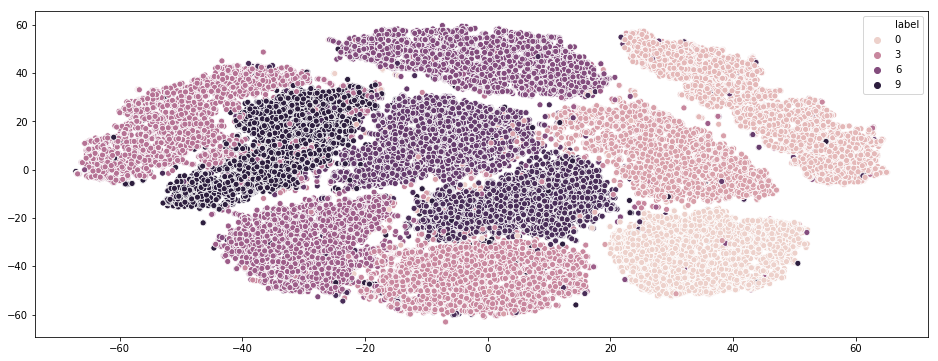

In [24]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=tsne_pixels_train[:,0], y=tsne_pixels_train[:,1], hue=df_train['label'])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
knn.fit(tsne_pixels_train, df_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
tsne_knn = knn.predict(tsne_pixels_train)

In [43]:
diff = pd.DataFrame({'tsne_knn_label': tsne_knn, 'label': df_train['label']})
difficult = diff.query('tsne_knn_label != label')
len(difficult) / float(len(diff))

0.02907142857142857

In [44]:
difficult.head()

,tsne_knn_label,label
76,9,7
89,4,6
95,7,9
125,8,5
131,3,8


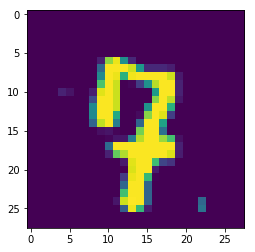

In [45]:
def display_image(idx):
    im1 = df_train.iloc[idx].values[1:].reshape((28, 28))
    plt.imshow(im1)
display_image(76)

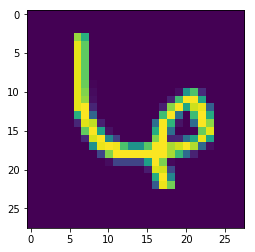

In [46]:
display_image(89)

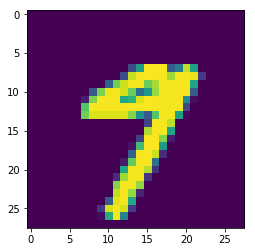

In [47]:
display_image(95)

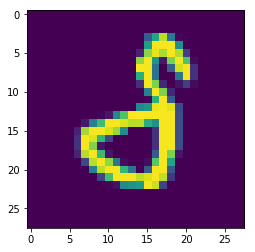

In [48]:
display_image(125)

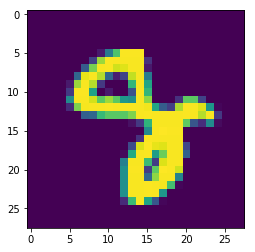

In [49]:
display_image(131)

In [63]:
difficult['label'].value_counts()

9    225
3    197
8    184
4    153
7    128
5    114
2     95
6     54
0     36
1     35
Name: label, dtype: int64

In [64]:
difficult['label'].value_counts() / float(len(diff))

9    0.005357
3    0.004690
8    0.004381
4    0.003643
7    0.003048
5    0.002714
2    0.002262
6    0.001286
0    0.000857
1    0.000833
Name: label, dtype: float64